In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [19]:
def plot(img, cmap=None):
    plt.figure(figsize=(20,10))
    plt.axis('off')
    plt.imshow(img, cmap=cmap)
    plt.show()

In [14]:
img = cv2.imread('../images/page-006.png')

In [15]:
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

In [16]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

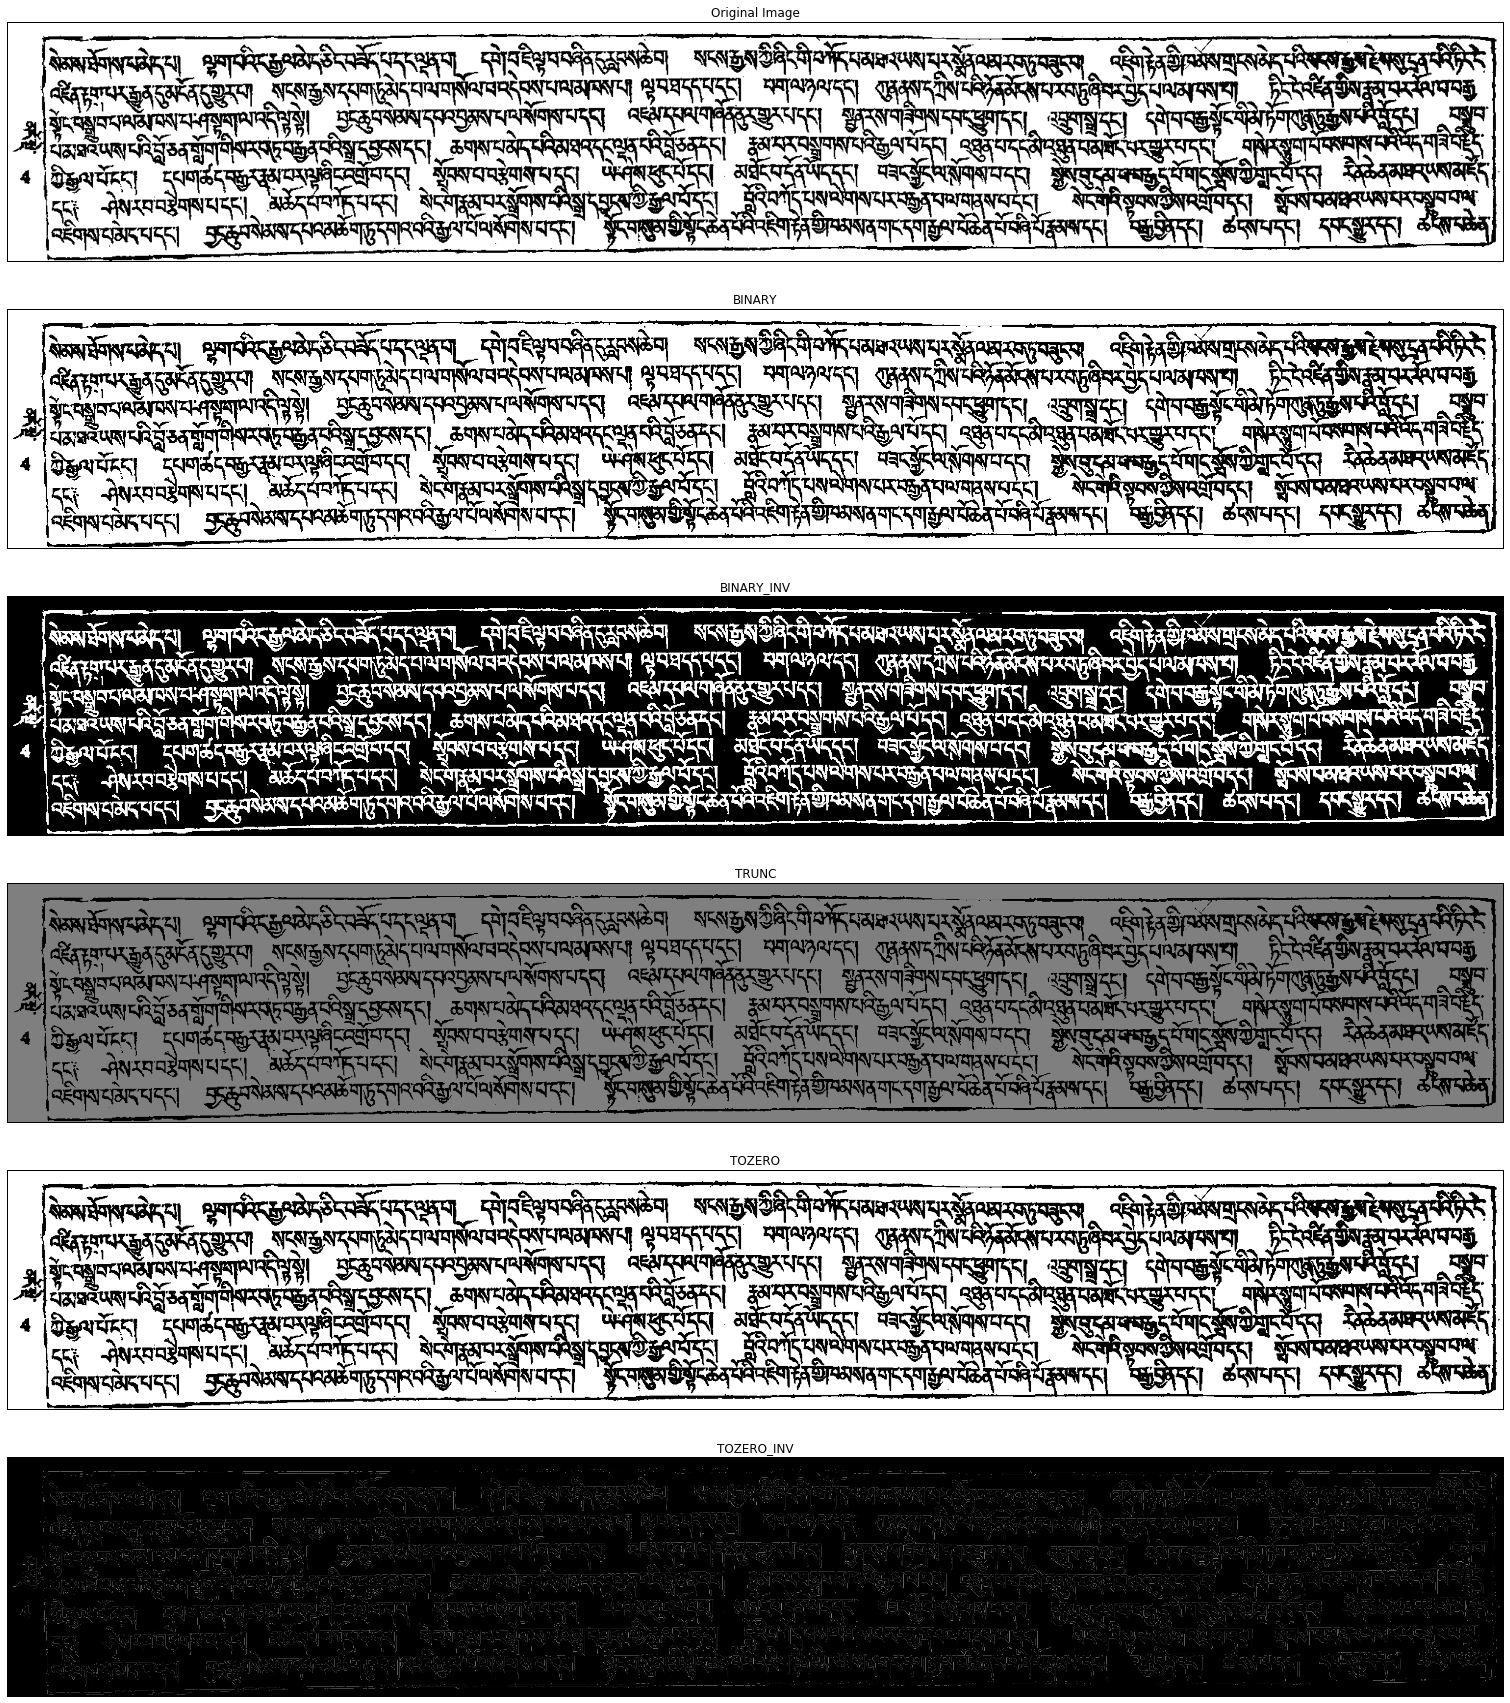

In [17]:
plt.figure(figsize=(50, 30))
for i in range(6):
    plt.subplot(6,1,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Adaptive Thresholding 

In [18]:
img = cv.medianBlur(img,5)

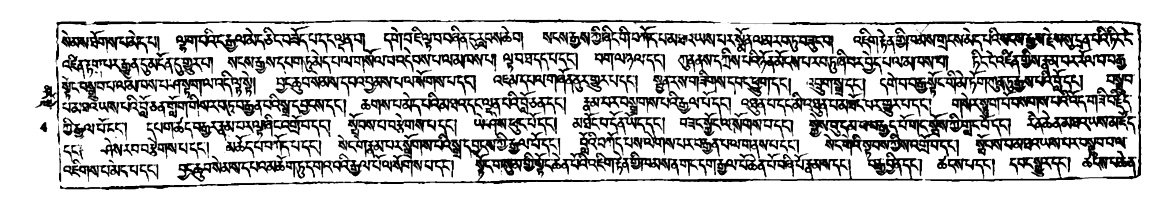

In [20]:
plot(img)

In [21]:
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

In [28]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [29]:
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)

In [30]:
th3 = cv2.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

In [31]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

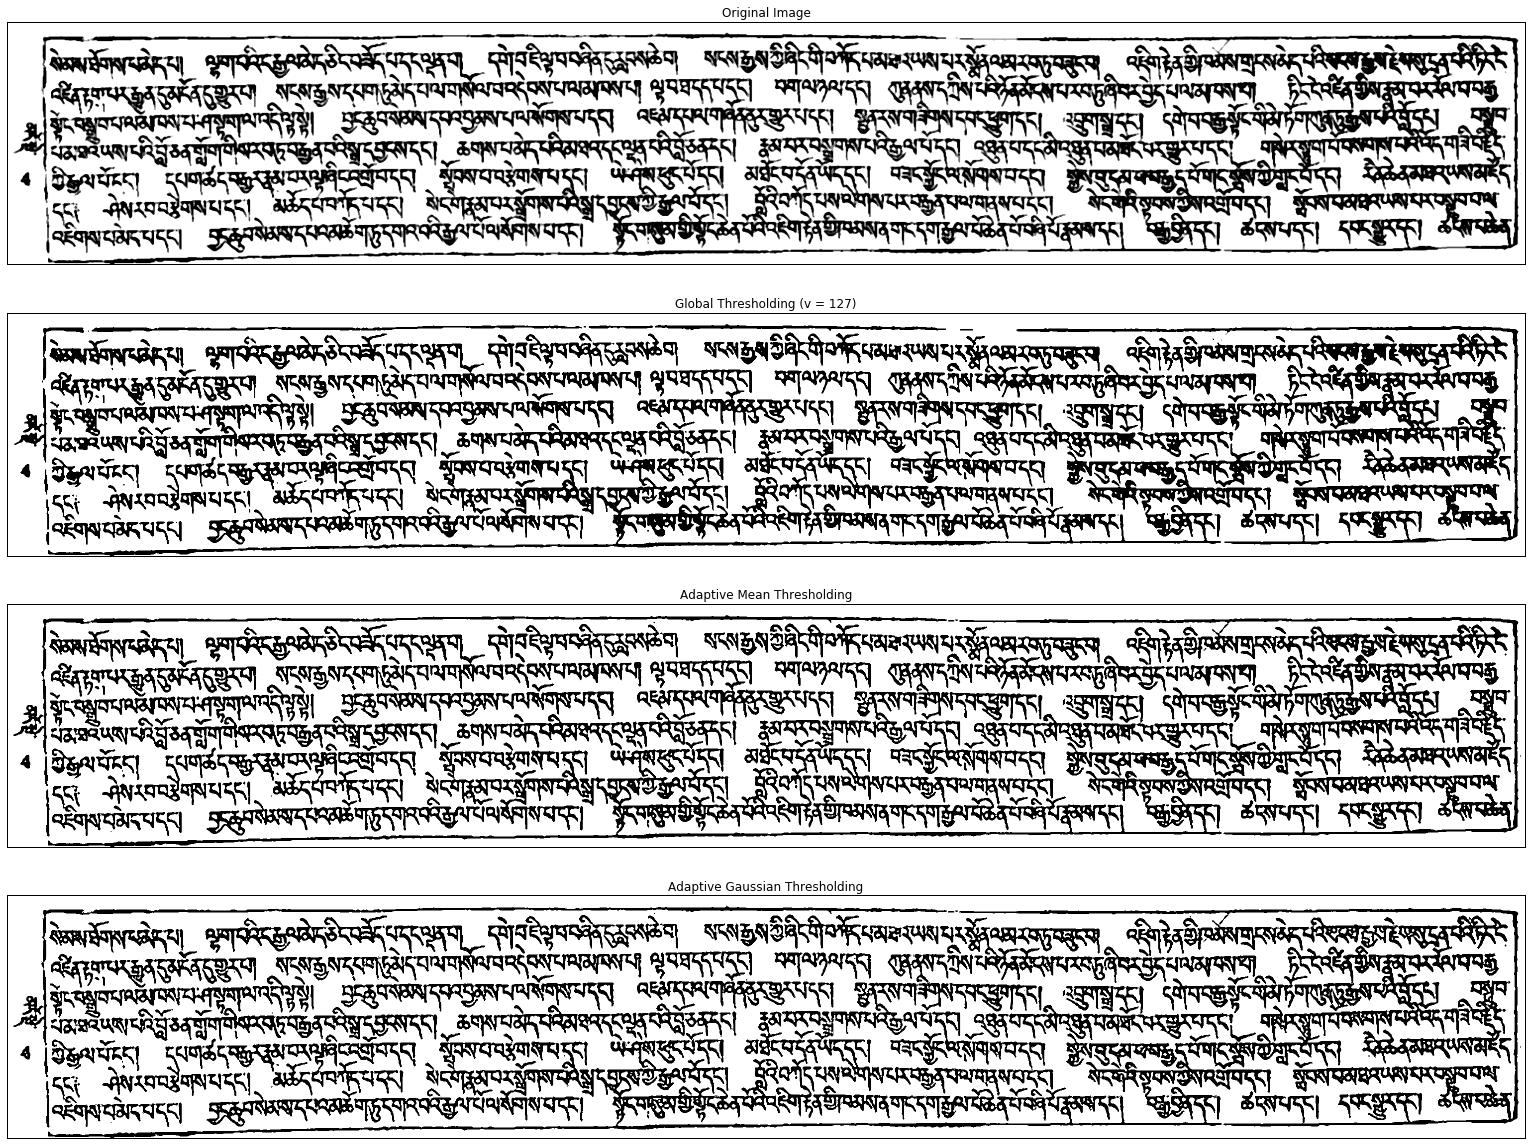

In [34]:
plt.figure(figsize=(50, 20))
for i in range(4):
    plt.subplot(4,1,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu’s Binarization 

In [39]:
# global thresholding
ret1,th1 = cv.threshold(gray,127,255,cv.THRESH_BINARY); ret1

127.0

In [40]:
# Otsu's thresholding
ret2,th2 = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU); ret2

136.0

In [42]:
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(gray,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

In [43]:
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

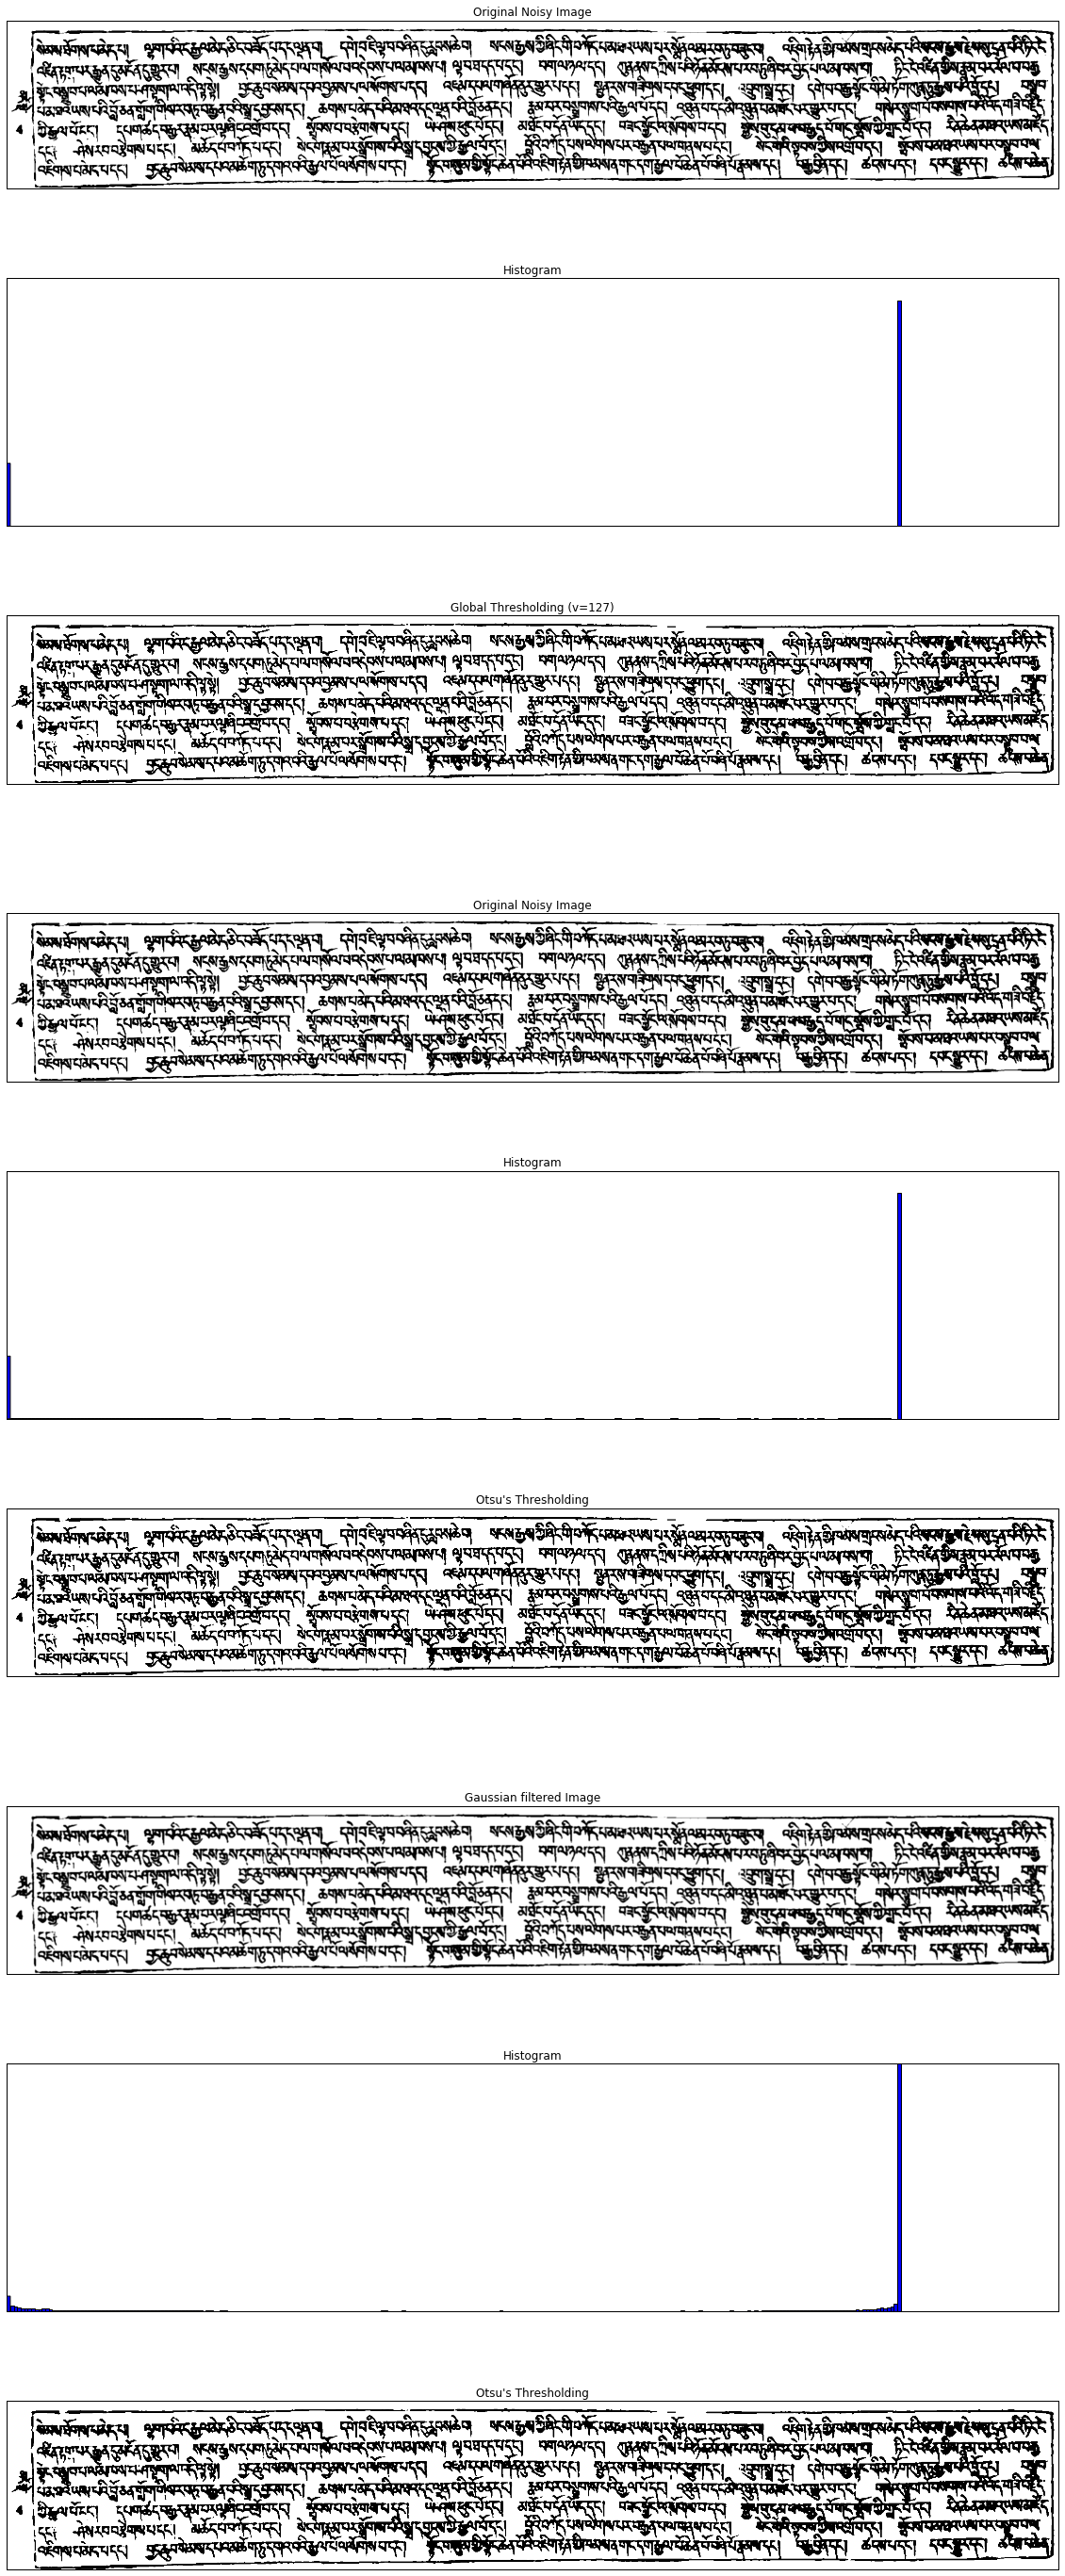

In [48]:
plt.figure(figsize=(20, 50))
for i in range(3):
    plt.subplot(9,1,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(9,1,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(9,1,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()